# ПАРСИНГ
теория

Чтобы проводить исследование, специалистам нужны данные. Где их взять?
Сайты - с оценками и мнением пользователей становятся значимымыми источниками информации для исследований самых разных объектов, в том числе и для формирования мнения относительно инфраструктуры городских территорий.  Переносить данные для анализа с сайта руками достаточно трудоемкий и бессмысленный процесс. Сбор данных с интернет-ресурса можно автоматизировать составив специальные программы - парсеры (https://habr.com/ru/company/click/blog/494020/). 

Мы научимся искать информацию по тегам и аттрибутам, извлекать и преобразовывать в формат удобный для дальнейших преобразований.

Давайте разбираться вместе!


### Подготовка

Установка библиотек

In [1]:
!pip install bs4
!pip install requests

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=a260f2b9ed5e7ddaec4ae1c096ab9fea6927a79bf44502bbfe0d654c94d81c53
  Stored in directory: c:\users\константин\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


Импорт библиотек

In [2]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests # получение данных по ссылке

## Введение: Парсинг Кинопоиска
<p>Рассмотрим страницу сайта Кинопоиска: <a href = 'https://www.kinopoisk.ru/lists/series-top250/'>Топ 250 сериалов</a></p>
<p>Страницы написаны на языке разметки <b>html</b>. Набор связанных страниц представляет собой сам <b>сайт</b> Соответственно, разработчик оперирует синтаксисом данного языка, создает структурированный текст, в котором встречаются определенные теги. А пользователь видит конечный результат: яркие картинки с элементами интерактивности.</p>
<p>Чтобы рассмотреть страницу в качестве разработчика на веб странице нужно кликнуть <b>ПКМ</b> и выбрать <b>Исследовать элемент</b> Появится окно, сверху есть значок курсора, который позволяет получить информацию о любом на странице наведенном элементе.</p>

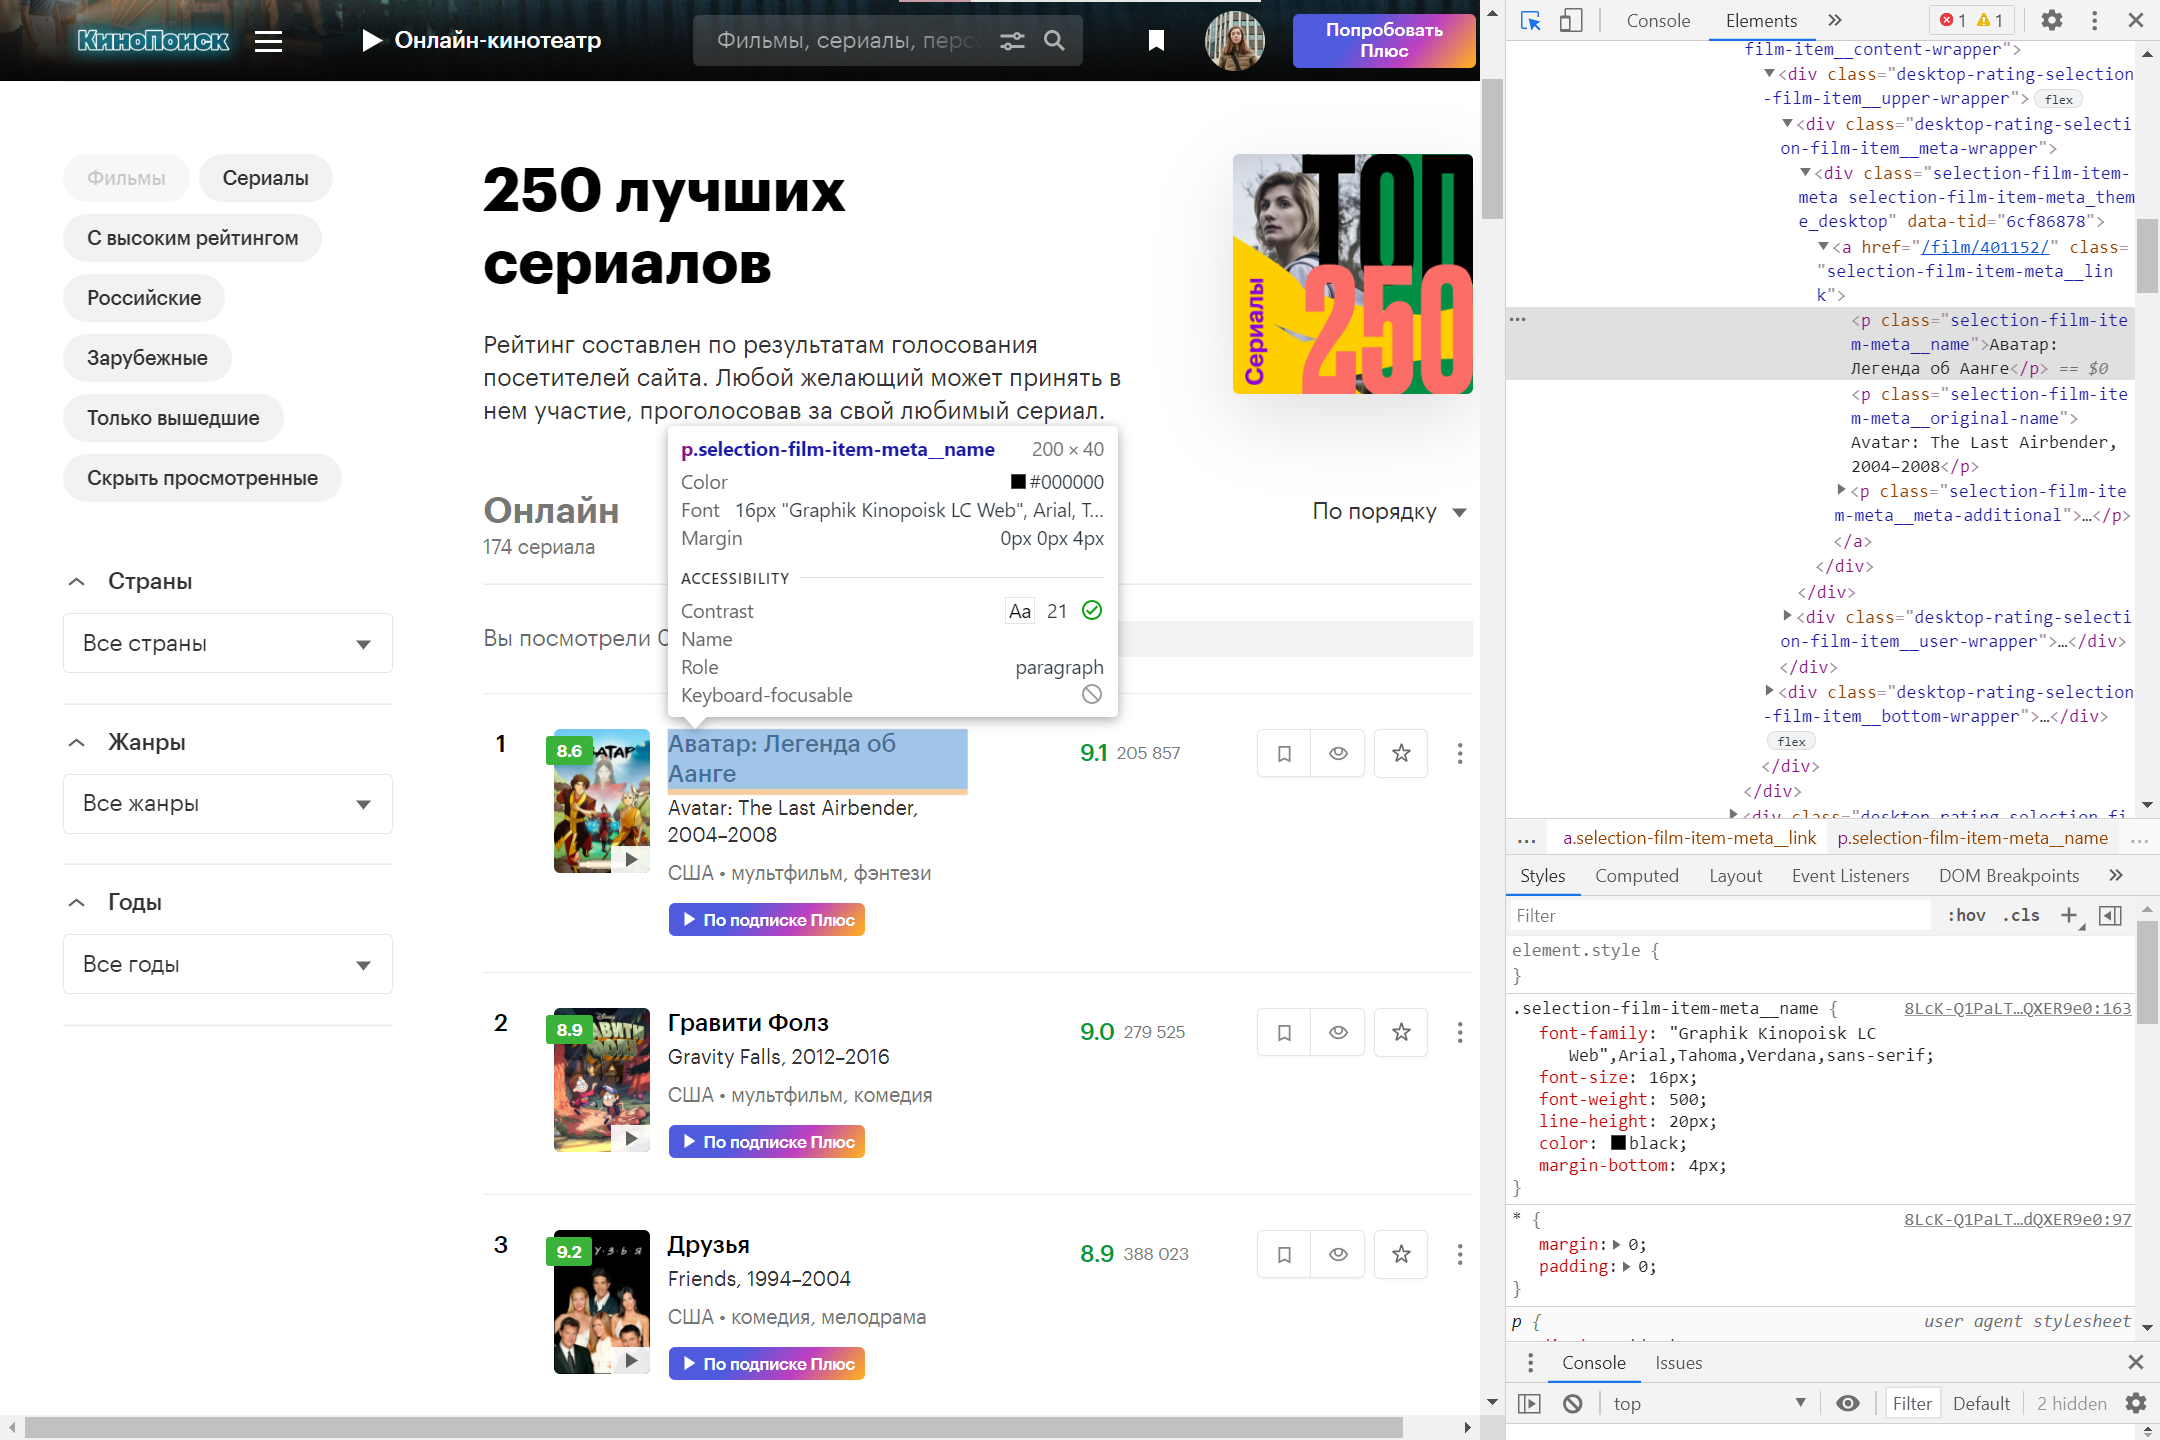

**Теги html**

Они заключены в треугольные скобки `<>`, закрывающий тег выглядит как `</тег>`.

<img src = "https://user-images.githubusercontent.com/4215285/52063562-f140a580-2583-11e9-8b74-6f8d809971e9.jpeg" >

Нас интересует контент страницы, то есть информация, заключенная в тег `<body></body>`.

Ниже представлен список тегов, которые присутствуют на исследуемой странице.

**Аттрибуты html**

Они присутствуют в тегах и имеют вид: 
* `class='class_name'`
* `name='name_name'`
* `id='id_name'`
* `style='style_name'`

Все что слева равно - это название аттрибута, справа - значение аттрибута.

<img src = 'https://seranking.ru/blog/wp-content/uploads/2019/05/html-элемент.png'></img>

**Работа с функцией .find_all()**

В переменной soup содержится структура html. Чтобы получить нужные данные, нужно обращаться по тегу и аттрибуту. Для этого воспользуемся функцией `find_all`

Сначала в функции указывается тег в кавычках, далее, если необходимо, через запятую в фигурных скобках - аттрибуты в виде: `{'название аттрибута':'значение аттрибута'}`

Так как функция `find_all` возвращает список тегов и то, что внутри них, нам нужно пройтись по каждому элементу этого списка и получить то, что нужно:

|Часть   | Код    |
|:-------|:-------|
| тег    |`.название_тега`|
| аттрибут | `['название аттрибута']`|
| соддержимое | `.text`|

### Парсер функции .find_all()

In [3]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests # получение данных по ссылке
import ipywidgets as widgets
from IPython.display import display, clear_output

print('Введите ссылку на страницу:')
url = input()

def find_all(part, tag, name_attr='', attr=''):
    exec("print([r"+part+" for r in soup.find_all('"+tag+"', {'"+name_attr+"':'"+attr+"'})])")
    
style = {'description_width': 'initial'}

tag = widgets.Text(description='Имя тега:', style = style)
name_attr = widgets.Text(description='Имя атрибута:',  style = style)
attr = widgets.Text(description='Значение атрибута:', style = style )
part = widgets.Text(description='Часть:', style = style )
btn = widgets.Button(
    description='Спарсить',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Спарсить',
    icon='search'
)
clean = widgets.Button(
    description='Очистить',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Очистить',
    icon='refresh'
)
display(tag, name_attr, attr, part, widgets.HBox([btn, clean]))

def on_button_clicked(b):
    find_all(part.value, tag.value, name_attr.value, attr.value)

def cleaning(b):
    clear_output()
    display(tag, name_attr, attr, part, widgets.HBox([btn, clean]))

html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')

btn.on_click(on_button_clicked)
clean.on_click(cleaning)

Введите ссылку на страницу:
https://yupest.github.io/nti/site/


Text(value='', description='Имя тега:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Имя атрибута:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Значение атрибута:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='Часть:', style=DescriptionStyle(description_width='initial'))

[<div class="col-md-4 project-item mix">
<div class="project-thumb">
<img alt="Набережная" src="images/project_1.jpg"/>
</div>
<div class="box-content project-detail">
<h2>Набережная у моста</h2>
<b>Координаты: </b><div class="coordinates"><span name="lattitude">26.1160</span><span>, </span><span name="longitude">-65.0363</span></div>
<div><span name="count_likes">25</span><span>❤️</span></div>
<div class="comments">
<b>Комментарии:</b>
<ul class="media-list">
<li class="media">
<div class="media-body">
<div class="media-heading">
<div class="author"><span class="rating">5</span><span>⭐</span><span class="devide">|</span></div>
<div class="metadata">
<span class="date">16 ноября 2015, 13:43</span>
</div>
</div>
<p class="review">Очень люблю эту набережную. Стараюсь каждый день гулять. Виды открываются прекрасные!</p>
</div>
</li>
<li class="media">
<div class="media-body">
<div class="media-heading">
<div class="author"><span class="rating">5</span><span>⭐</span><span class="devide">|<

In [ ]:
names = ['Рик и Морти', 'Гравити Фолз', 'Аватар: Легенда об Аанге', 'Друзья', 'Сопрано', 'Во все тяжкие', 'Офис', 'Теория большого взрыва', 'Клиника', 'Бесстыжие', 'Семнадцать мгновений весны', 'Аркейн', 'Игра престолов', 'Доктор Хаус', 'Как я встретил вашу маму', 'По ту сторону изгороди', 'Атака титанов', 'Место встречи изменить нельзя', 'Ковбой Бибоп', 'Шерлок', 'Гордость и предубеждение', 'Берсерк', 'Отчаянные домохозяйки', 'Светлячок', 'Йеллоустоун', 'Человек-паук', 'Аббатство Даунтон', 'Южный Парк', 'Футурама', 'Крутой учитель Онидзука', 'Голяк', 'Чернобыль', 'Наруто: Ураганные хроники', 'Братья по оружию', 'Звёздная принцесса и силы зла', 'Настоящий детектив', 'Крайний космос', 'Дом совы', 'Ликвидация', 'Вызовите акушерку', 'Приключения Пети и Волка', 'Американская семейка', 'Атака титанов: Выбор без сожалений', 'Пуаро', '12 стульев', 'Время приключений', 'Стальной алхимик: Братство', 'Черное зеркало', 'Силиконовая долина', 'Повар императора']
len(names)

50

In [ ]:
rating = ['9.1', '9.0', '8.9', '8.9', '8.8', '8.8', '8.8', '8.8', '8.8', '8.8', '8.8', '8.7', '8.7', '8.7', '8.7', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3']
rating = [float(r) for r in rating]

## Примеры парсинга с сайта локаций

In [ ]:
html = requests.get('https://yupest.github.io/nti/site/').text
soup = BeautifulSoup(html, 'html')
soup

<!DOCTYPE html>
<html>
<head>
<title>Места района города Энск</title>
<meta charset="utf-8"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<link href="css/bootstrap.css" rel="stylesheet"/>
<link href="css/templatemo-misc.css" rel="stylesheet"/>
<link href="css/templatemo-style.css" rel="stylesheet"/>
<link href="http://fonts.googleapis.com/css?family=Roboto+Slab:400,700,300,100" rel="stylesheet"/>
<link href="http://fonts.googleapis.com/css?family=Roboto:400,400italic,300italic,300,500,500italic,700,900" rel="stylesheet"/>
</head>
<body>
<div class="col-md-4 project-item mix">
<div class="project-thumb">
<img alt="Набережная" src="images/project_1.jpg"/>
</div>
<div class="box-content project-detail">
<h2>Набережная у моста</h2>
<b>Координаты: </b><div class="coordinates"><span name="lattitude">26.1160</span><span>, </span><span name="longitude">-65.0363</span></div>
<div><span name="count_likes">25</span><span>❤️</span></div>
<div class="c

**Названия локаций**

В теге, котором содержится название мест, отсутсвуют аттрибуты. Также этот тег является уникальным - то есть тег `h2` содержит только названия мест. Поэтому функции достаточно передать название тега. 

In [ ]:
locations = [r.text for r in soup.find_all('h2')]
locations

['Набережная у моста',
 'Динамо',
 'Вкус Искусства',
 'Набережная на пляже',
 'Имбирь',
 'Buono']

**Категории локаций**

In [ ]:
categories = [r['alt'] for r in soup.find_all('img')]
categories

['Набережная', 'Парк', 'Кафе', 'Набережная', 'Кафе', 'Кафе']

**Отзывы**

In [ ]:
text = [r.text for r in soup.find_all('p', {'class':'review'})]
text

['Очень люблю эту набережную. Стараюсь каждый день гулять. Виды открываются прекрасные!',
 'Гулять прекрасно! А мне, как молодой маме, очень нравится, что есть лавочки. Обожаю дышать морским воздухом.',
 'Ничего особенного. Ну есть лавочки, так так и должно быть! Скучно.',
 'Парк супер! можно покормить белочек) Это наша местная достопримечательность.',
 'Тропинки размывает после дождя! невозможно пройти. А так все норм, есть лавочки, можно гулять.',
 'Мне нравится там гулять. Чисто и красиво',
 'Арт-кофейня приглашает окунуться в мир сюрреализма и поп-арта. Уникальный интерьер и оригинальные десерты позволят гостям стать частью картин знаменитых художников.',
 'Недавно открылось, не хватает пледов - сидеть на улице вечером холодно, пришлось в перейти в помещение.',
 'Остановок рядом нет! а так все хорошо.',
 'Так красиво! Хорошо, что мы здесь родились. все чисто, аккуратно сделано. Любимое место туристов и местных.',
 'Центр города! приятное место. Ходим сюда с друзьями, катаемся на ве

**Рейтинги отзывов**

Для того, чтобы получить целочисленный тип данных, нужно наши строковые значения поместить в функцию `int()`

In [ ]:
rating = [int(r.text) for r in soup.find_all('span', {'class':'rating'})]
rating

[5, 5, 3, 5, 3, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 4, 1]

**Лайки**

In [ ]:
likes = [int(r.text) for r in soup.find_all('span', {'name':'count_likes'})]
likes

[25, 18, 14, 50, 40, 10]

**Координаты**

Координаты представлены вещественным числовым типом. Поэтому для преобразования строки в этот тип, используем `float()`

In [ ]:
lattitudes = [float(r.text) for r in soup.find_all('span', {'name':'lattitude'})]
lattitudes

[26.116, 44.2137, 22.4313, 40.1789, 40.0444, 30.7513]

In [ ]:
longitudes = [float(r.text) for r in soup.find_all('span', {'name':'longitude'})]
longitudes

[-65.0363, -52.5705, -43.9601, 31.0728, -23.2252, 6.8338]

**Посещаемость**

Найдем значения посещаемостей. Она представлена в виде процента в стиле тега `div`. Но процент всегда разный, а других аттрибутов в этом теге нет. Поэтому мы не можем искать по этому тегу.

Поэтому найдем родительский тег, в котором заключен нужный нам тег. Он также `div`, но имеет класс `pipe line`. Посмотрим, что вернет нам поиск.

In [ ]:
[el for el in soup.find_all('div',{'class':'pipe line'})]

[<div class="pipe line">
 <div style="width: 30%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 38%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 35%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 28%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 70%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 90%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 75%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 33%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 30%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 40%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 45%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 60%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 80%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 64%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 10%"> </div>
 </div>, <div clas

Следующим шагом, мы можем получить дочерний тег.

In [ ]:
[el.div for el in soup.find_all('div',{'class':'pipe line'})]

[<div style="width: 30%"> </div>,
 <div style="width: 38%"> </div>,
 <div style="width: 35%"> </div>,
 <div style="width: 28%"> </div>,
 <div style="width: 70%"> </div>,
 <div style="width: 90%"> </div>,
 <div style="width: 75%"> </div>,
 <div style="width: 33%"> </div>,
 <div style="width: 30%"> </div>,
 <div style="width: 40%"> </div>,
 <div style="width: 45%"> </div>,
 <div style="width: 60%"> </div>,
 <div style="width: 80%"> </div>,
 <div style="width: 64%"> </div>,
 <div style="width: 10%"> </div>,
 <div style="width: 9%"> </div>,
 <div style="width: 6%"> </div>,
 <div style="width: 10%"> </div>,
 <div style="width: 30%"> </div>,
 <div style="width: 60%"> </div>,
 <div style="width: 70%"> </div>,
 <div style="width: 80%"> </div>,
 <div style="width: 85%"> </div>,
 <div style="width: 90%"> </div>,
 <div style="width: 75%"> </div>,
 <div style="width: 50%"> </div>,
 <div style="width: 10%"> </div>,
 <div style="width: 15%"> </div>,
 <div style="width: 60%"> </div>,
 <div style="wid

Уже лучше! Для того, чтобы обратиться к значению интересующих нас аттрибутов, в квадратных скобках укажем этот аттрибут

In [ ]:
[el.div['style'] for el in soup.find_all('div',{'class':'pipe line'})]

['width: 30%',
 'width: 38%',
 'width: 35%',
 'width: 28%',
 'width: 70%',
 'width: 90%',
 'width: 75%',
 'width: 33%',
 'width: 30%',
 'width: 40%',
 'width: 45%',
 'width: 60%',
 'width: 80%',
 'width: 64%',
 'width: 10%',
 'width: 9%',
 'width: 6%',
 'width: 10%',
 'width: 30%',
 'width: 60%',
 'width: 70%',
 'width: 80%',
 'width: 85%',
 'width: 90%',
 'width: 75%',
 'width: 50%',
 'width: 10%',
 'width: 15%',
 'width: 60%',
 'width: 50%',
 'width: 80%',
 'width: 90%',
 'width: 40%',
 'width: 20%',
 'width: 15%',
 'width: 50%',
 'width: 15%',
 'width: 10%',
 'width: 20%',
 'width: 75%',
 'width: 85%',
 'width: 45%']

И получим численные значения, чтобы с ними можно было производить вычисления. Для этого, получим числа. Строка состоит из элементов - символов, например нулевой элемент строки `width: 38%` - это `w`. Чтобы получить срез элементов, например, символы строки с 7 элемента, нужно в квадратных скобках после строки указать номер элемента и символ среза ":", то есть : `'width: 38%'[7:]`, тогда результатом такой операции станет `'38%'`.
Чтобы убрать последний символ процента, нужно в срезе указать номер с конца - то есть `-1` и поставить это значение после двоеточия, что обозначает "все элементы до последнего символа":
`'width: 38%'[7:][:-1]`
В результате мы получим числа.

In [ ]:
[el.div['style'][7:][:-1] for el in soup.find_all('div',{'class':'pipe line'})]

['30',
 '38',
 '35',
 '28',
 '70',
 '90',
 '75',
 '33',
 '30',
 '40',
 '45',
 '60',
 '80',
 '64',
 '10',
 '9',
 '6',
 '10',
 '30',
 '60',
 '70',
 '80',
 '85',
 '90',
 '75',
 '50',
 '10',
 '15',
 '60',
 '50',
 '80',
 '90',
 '40',
 '20',
 '15',
 '50',
 '15',
 '10',
 '20',
 '75',
 '85',
 '45']

Однако, как вы можете наблюдать значения до сих пор являются типом строки. Нам нужно преобразовать в целочисленный тип. Для этого воспользуемся преобразованием `int()` и в скобках укажем наше значение строки.

In [ ]:
[int(el.div['style'][7:][:-1]) for el in soup.find_all('div',{'class':'pipe line'})]

[30,
 38,
 35,
 28,
 70,
 90,
 75,
 33,
 30,
 40,
 45,
 60,
 80,
 64,
 10,
 9,
 6,
 10,
 30,
 60,
 70,
 80,
 85,
 90,
 75,
 50,
 10,
 15,
 60,
 50,
 80,
 90,
 40,
 20,
 15,
 50,
 15,
 10,
 20,
 75,
 85,
 45]

Присвоим эти значения переменной `density`

In [ ]:
density = [int(el.div['style'][7:-1]) for el in soup.find_all('div',{'class':'pipe line'})]

In [ ]:
import pandas as pd

df = pd.DataFrame({'name':locations, 'like':likes, 'lat':lattitudes, 'lon':longitudes})

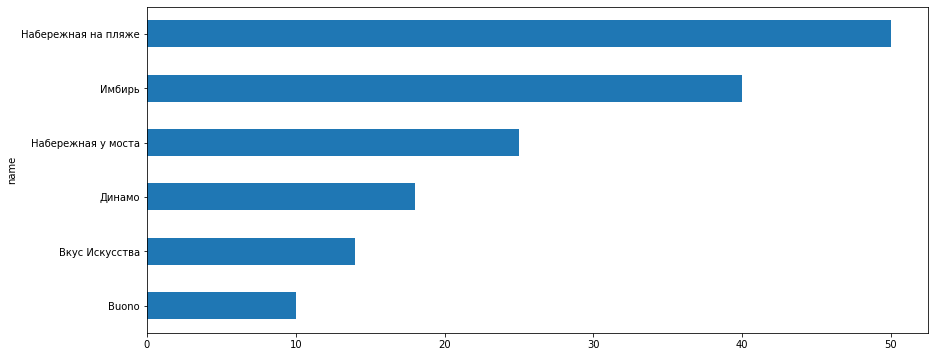

In [ ]:
df.set_index('name').sort_values('like', ascending = True)['like'].plot(kind = 'barh', figsize = (14, 6))

In [ ]:
url = 'https://yupest.github.io/nti/site/final1/district1.html'
soup = BeautifulSoup(requests.get(url).text, 'html')
for el in soup.find_all('div', {'class':'chart'}):
  week = [r.text for r in el.select('div[class=line]')]
  print(week)

['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскре

# Пример реализации

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re

https://ru.restaurantguru.com/restaurant-Irkutsk-t1

In [ ]:
url = 'https://ru.restaurantguru.com/restaurant-Irkutsk-t1'

## Проба

In [ ]:
html = requests.get(url).text
soup = BeautifulSoup(html, 'html')

In [ ]:
session = requests.Session()
session.headers.update({'User-Agent': 'Mozilla/5.0',
                        'Cookie':'PHPSESSID=58beb3fe43460899158c38480cf5a22a; _gcl_au=1.1.760961709.1663660981; _ga=GA1.2.1488142939.1663660982; _gid=GA1.2.48871830.1663660982; notexpanded=1; currentCountry=24; currentCity=282; dc_location=ci282; client_time_hour=2022-09-20 19:52:52; rg_check=1; closebnr=1; pier_tutor_nums={"nums":[4,2,1,5,3],"current":4}'})

html = session.get(url).text
soup = BeautifulSoup(html, 'html')

In [ ]:
soup

<html>
<head><title>503 Service Temporarily Unavailable</title></head>
<body>
<center><h1>503 Service Temporarily Unavailable</h1></center>
<hr/><center>nginx</center>
</body>
</html>

In [ ]:
len([i for i in soup.find_all('div', {'class':'restaurant_row'})])

0

In [ ]:
import tqdm
import time

In [ ]:
for i in tqdm.tqdm_notebook([1,2,3,4], total = 4):
  time.sleep(0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
items = []
for el in soup.find_all('div', {'class':'restaurant_row'}):
  work_time = el.find('div', {'class':'work_time'})
  time = ['']
  if work_time.text.find('Круглосуточно')!=-1:
      time = ['Круглосуточно']
  elif work_time.span.text == 'Открыт сейчас':
      time = work_time.text.split('\n')[3].split(' - ')

  d = {'title':el.find('a', {'class':'notranslate title_url'}).text,
       'number':int(re.findall('\d+', el.find('div', {'class':'number'}).text)[0]),
       'cuisine':re.sub(r"[\n|$$$$]",'', el.find('div', {'class':'wrap_cuisine'}).text).split(', '),
       'time':time,
       'type': (el.find('span', {'class':'grey'})).text[3:].split(', ')
       }
  items.append(d)

In [ ]:
pd.DataFrame(items).explode('cuisine')

,title,number,cuisine,time,type
0,Арлекино,109,Международная,"[12:00, 22:00]",[Ресторан]
0,Арлекино,109,Подходит для вегетарианцев,"[12:00, 22:00]",[Ресторан]
1,Pho Me,1,Азиатская,"[12:00, 22:00]","[Кафе, Ресторан]"
1,Pho Me,1,Вьетнамская,"[12:00, 22:00]","[Кафе, Ресторан]"
1,Pho Me,1,Китайская,"[12:00, 22:00]","[Кафе, Ресторан]"
...,...,...,...,...,...
18,Bier Haus,18,Подходит для вегетарианцев,"[12:00, 02:00]","[Паб и бар, Ресторан]"
19,The Library Bar - Бар Библиотека,19,Американская,[],[Паб и бар]
19,The Library Bar - Бар Библиотека,19,Европейская,[],[Паб и бар]
20,Harat's pub на Баргузине (Хэратс паб),20,Европейская,"[12:00, 02:00]","[Паб и бар, Ресторан]"


## Сбор
Информационную модель данных необходимо строить в соответствии с возможностями сервиса визуализации
<img src = 'https://thumb.tildacdn.com/tild6636-3434-4366-a163-396436353635/-/format/webp/image.png'>

## Второй способ сбора

In [ ]:
name = [i['title'] for i in soup.find_all('a', {'class':'notranslate title_url'})]
ind = [int(re.findall('\d+',i.text)[0]) for i in soup.find_all('div', {'class':'number'})]
cuisine = [re.sub(r"[\n|$$$$]",'',i.text).split(', ') for i in soup.find_all('div', {'class':'wrap_cuisine'})]
types = [i.span.text[3:].split(', ') for i in soup.find_all('div', {'class':'title'})]

time = []
for i in soup.find_all('div', {'class':'work_time'}):
    if i.text.find('Круглосуточно')!=-1:
        time.append(['Круглосуточно',''])
    elif i.span.text == 'Открыт сейчас':
        time.append(i.text.split('\n')[3].split(' - '))
    else:
        time.append(['', ''])

In [ ]:
time

[['12:00', '01:00'],
 ['08:00', '20:00'],
 ['Круглосуточно', ''],
 ['12:00', '22:00'],
 ['10:00', '22:00'],
 ['09:00', '21:00'],
 ['08:00', '23:00'],
 ['11:00', '23:00'],
 ['12:00', '02:00'],
 ['12:00', '02:00'],
 ['10:00', '01:00'],
 ['11:30', '00:00'],
 ['12:00', '02:00'],
 ['09:00', '22:00'],
 ['12:00', '22:00'],
 ['10:00', '22:00'],
 ['12:00', '00:00'],
 ['07:00', '23:00'],
 ['10:00', '23:00'],
 ['11:00', '00:00'],
 ['11:00', '23:00']]

In [ ]:
df_1 = pd.DataFrame({'id': ind,
             'name':name, 
             'type':types, 
             'cuisine':cuisine, 
             'open_time':np.array(time).transpose()[0], 
             'close_time':np.array(time).transpose()[1],
             'around_clock':0})
df_1.head()

,id,name,type,cuisine,open_time,close_time,around_clock
0,80,Мангал,"[Барбекю, Паб и бар]",[Гриль],12:00,01:00,0
1,1,Инжинирия кофе,"[Кафе, Десерты, Кофейня]",[ ],08:00,20:00,0
2,2,Охотников,"[Ресторан, Паб и бар]","[Русская, Гриль, Подходит для вегетарианцев ]",Круглосуточно,,0
3,3,ДизайнБар,"[Ресторан, Паб и бар]","[Европейская, Центральноевропейская, Современн...",12:00,22:00,0
4,4,Фигаро,"[Ресторан, Паб и бар, Итальянский ресторан]","[Итальянская, Средиземноморская, Французская, ...",10:00,22:00,0


In [ ]:
df_1.loc[df.open_time=='Круглосуточно', 'around_clock'] = 1
df_1.open_time = df_1.open_time.replace('Круглосуточно', '')
df_1.head()

,id,name,type,cuisine,open_time,close_time,around_clock
0,80,Мангал,"[Барбекю, Паб и бар]",[Гриль],12:00,01:00,0
1,1,Инжинирия кофе,"[Кафе, Десерты, Кофейня]",[ ],08:00,20:00,0
2,2,Охотников,"[Ресторан, Паб и бар]","[Русская, Гриль, Подходит для вегетарианцев ]",,,0
3,3,ДизайнБар,"[Ресторан, Паб и бар]","[Европейская, Центральноевропейская, Современн...",12:00,22:00,0
4,4,Фигаро,"[Ресторан, Паб и бар, Итальянский ресторан]","[Итальянская, Средиземноморская, Французская, ...",10:00,22:00,0


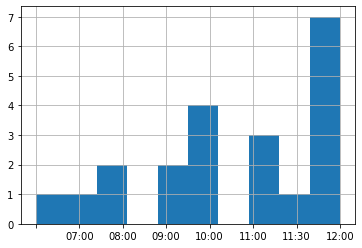

In [ ]:
df_1.sort_values('open_time').open_time.hist()

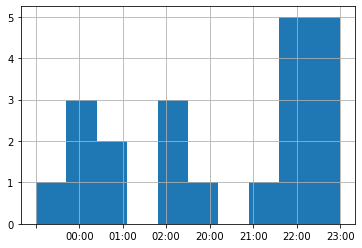

In [ ]:
df_1.sort_values('close_time').close_time.hist()

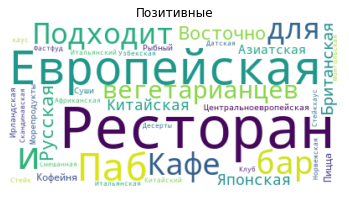

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", collocations=False).generate((' ').join(df['value'].to_list()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Характеристики заведений')
plt.axis("off")
plt.show()

## One hot encoding

In [ ]:
pd.get_dummies(df[['value']])

,value_,value_\nАзиатская,value_\nАфриканская,value_\nБританская,value_\nВосточно-европейская,value_\nЕвропейская,value_\nКитайская,value_\nПодходит для вегетарианцев,value_\nСтейк-хаус,value_\nСуши,...,value_Русская,value_Рыбный ресторан,value_Скандинавская,value_Смешанная,value_Стейкхаус,value_Суши,value_Узбекская,value_Фастфуд,value_Центральноевропейская,value_Японская
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Сохранение

In [ ]:
df_1.to_csv('catering.csv', index = False)
df.to_csv('catering.csv', index = False)

In [ ]:
from google.colab import files

files.download('catering.csv')

# Задание

1. Сформируйте наборы данных по любой из представленных тематик:


*   [Фильмы по настроению](https://yupest.github.io/nti/НТИ-2022/films/)
*   [Книги](https://yupest.github.io/nti/НТИ-2022/books/)
*   [Породы собак](https://yupest.github.io/nti/НТИ-2022/site/)

2. Постройте на собранных данных различные графики/диаграммы в количестве 4 шт. и отобразите их в виде python notebook (google colab). * плюсом будет, если графики будут расположены в формате дашборда - в одном выводе:

![](https://www.decolore.net/wp-content/uploads/2017/05/material-dashboard-2.jpg)

3. Добавьте элементы интерактивности в графики.

4. Презентуйте свою работу 11.10.






In [97]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests # получение данных по ссылке
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [98]:
url = 'https://yupest.github.io/nti/%D0%9D%D0%A2%D0%98-2022/site/'

In [99]:
html = requests.get(url).text
soup = BeautifulSoup(html, 'html')

In [100]:
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="style.css" rel="stylesheet"/>
<title>Лапки</title>
</head>
<body>
<table class="table">
<thead>
<tr>
<th>Категории</th>
<th class="quality">Качества</th>
<th>Числовые показатели</th>
</tr>
</thead>
<tbody>
<tr>
<td>Название породы</td>
<td class="quality">Агрессивность</td>
<td class="measure">Вес минимальный</td>
</tr>
<tr>
<td>Страна происхождения</td>
<td class="quality">Активность</td>
<td class="measure">Вес максимальный</td>
</tr>
<tr>
<td></td>
<td class="quality">Дрессировка</td>
<td class="measure">Рост минимальный</td>
</tr>
<tr>
<td></td>
<td class="quality">Линька</td>
<td class="measure">Рост максимальный</td>
</tr>
<tr>
<td></td>
<td class="quality">Потребность в уходе</td>
<td class="measure">Продолжительность жизни минимальная</td>
</tr>
<tr>
<td></td>
<td class="quality">Дружелюбность</td>
<td class="measure">Продолжительность жизни ма

In [101]:
len([i for i in soup.find_all('div', {'class':'pet-head'})])

151

In [102]:
result_set = soup.find_all('div', {'class':'pet-head'})

In [103]:
container = []
for i in result_set:
    data = {'Порода' : i.find('h1').text,
            'Страна' : i.find('span', {'class':'country'}).text,
            'Минимальный вес': float(i.find('span', {'class':'weight_min'}).text.strip() or 0),
            'Максимальный вес': float(i.find('span', {'class':'weight_max'}).text.strip() or 0),
            'Минимальный рост': float(i.find('span', {'class':'height_min'}).text.strip() or 0),
            'Максимальный рост': float(i.find('span', {'class':'height_max'}).text.strip() or 0),
            'Минимальная продолжительность жизни': float(i.find('span', {'class':'life_min'}).text.strip() or 0),
            'Максимальная продолжительность жизни': float(i.find('span', {'class':'life_max'}).text.strip() or 0),
            'Агрессивность' : float(i.find('span', {'class':'val1'}).text),
            'Активность' : float(i.find('span', {'class':'val1'}).text),
            'Дрессировка' : float(i.find('span', {'class':'val1'}).text),
            'Линька' : float(i.find('span', {'class':'val1'}).text),
            'Потребность в уходе' : float(i.find('span', {'class':'val1'}).text),
            'Дружелюбность' : float(i.find('span', {'class':'val1'}).text),
            'Здоровье' : float(i.find('span', {'class':'val1'}).text),
            'Стоимость содержания' : float(i.find('span', {'class':'val1'}).text),
            'Отношение к одиночеству' : float(i.find('span', {'class':'val1'}).text),
            'Интеллект' : float(i.find('span', {'class':'val1'}).text),
            'Шум' : float(i.find('span', {'class':'val1'}).text),
            'Охранные качества' : float(i.find('span', {'class':'val1'}).text)}
    container.append(data)

In [104]:
parsed_date = pd.DataFrame(container)

In [105]:
# Введем дополнительные поля 
parsed_date["Продолжительность жизни среднее"] = (parsed_date['Максимальная продолжительность жизни']+parsed_date['Минимальная продолжительность жизни'])/2
parsed_date["Вес среднее"] = (parsed_date['Максимальный вес']+parsed_date['Минимальный вес'])/2
parsed_date["Рост среднее"] = parsed_date[['Максимальный рост','Минимальный рост']].mean(axis = 1)

In [106]:
# Топ-5 самых тяжелых
x1 = parsed_date.sort_values(by='Вес среднее', ascending=False).head(5)['Порода']
y1 = parsed_date.sort_values(by='Вес среднее', ascending=False).head(5)['Вес среднее']

In [107]:
# Топ-5 самых высоких
x2 = parsed_date.sort_values(by='Рост среднее', ascending=False).head(5)['Порода']
y2 = parsed_date.sort_values(by='Рост среднее', ascending=False).head(5)['Рост среднее']

In [108]:
# Дрессируемость
x3 = ['Плохо дрессируются', 'Хорошо дрессируются'] 
y3 = [parsed_date.loc[(parsed_date['Дрессировка'] <= 3)]['Порода'].count(), parsed_date.loc[(parsed_date['Дрессировка'] > 3)]['Порода'].count()]

parsed_date.loc[(parsed_date['Дрессировка'] <= 3)]['Порода'].count()

133

In [115]:
x4 = parsed_date.loc[(parsed_date['Стоимость содержания'] == 5)]['Порода']
y4 = parsed_date.loc[(parsed_date['Стоимость содержания'] == 5)]['Стоимость содержания']

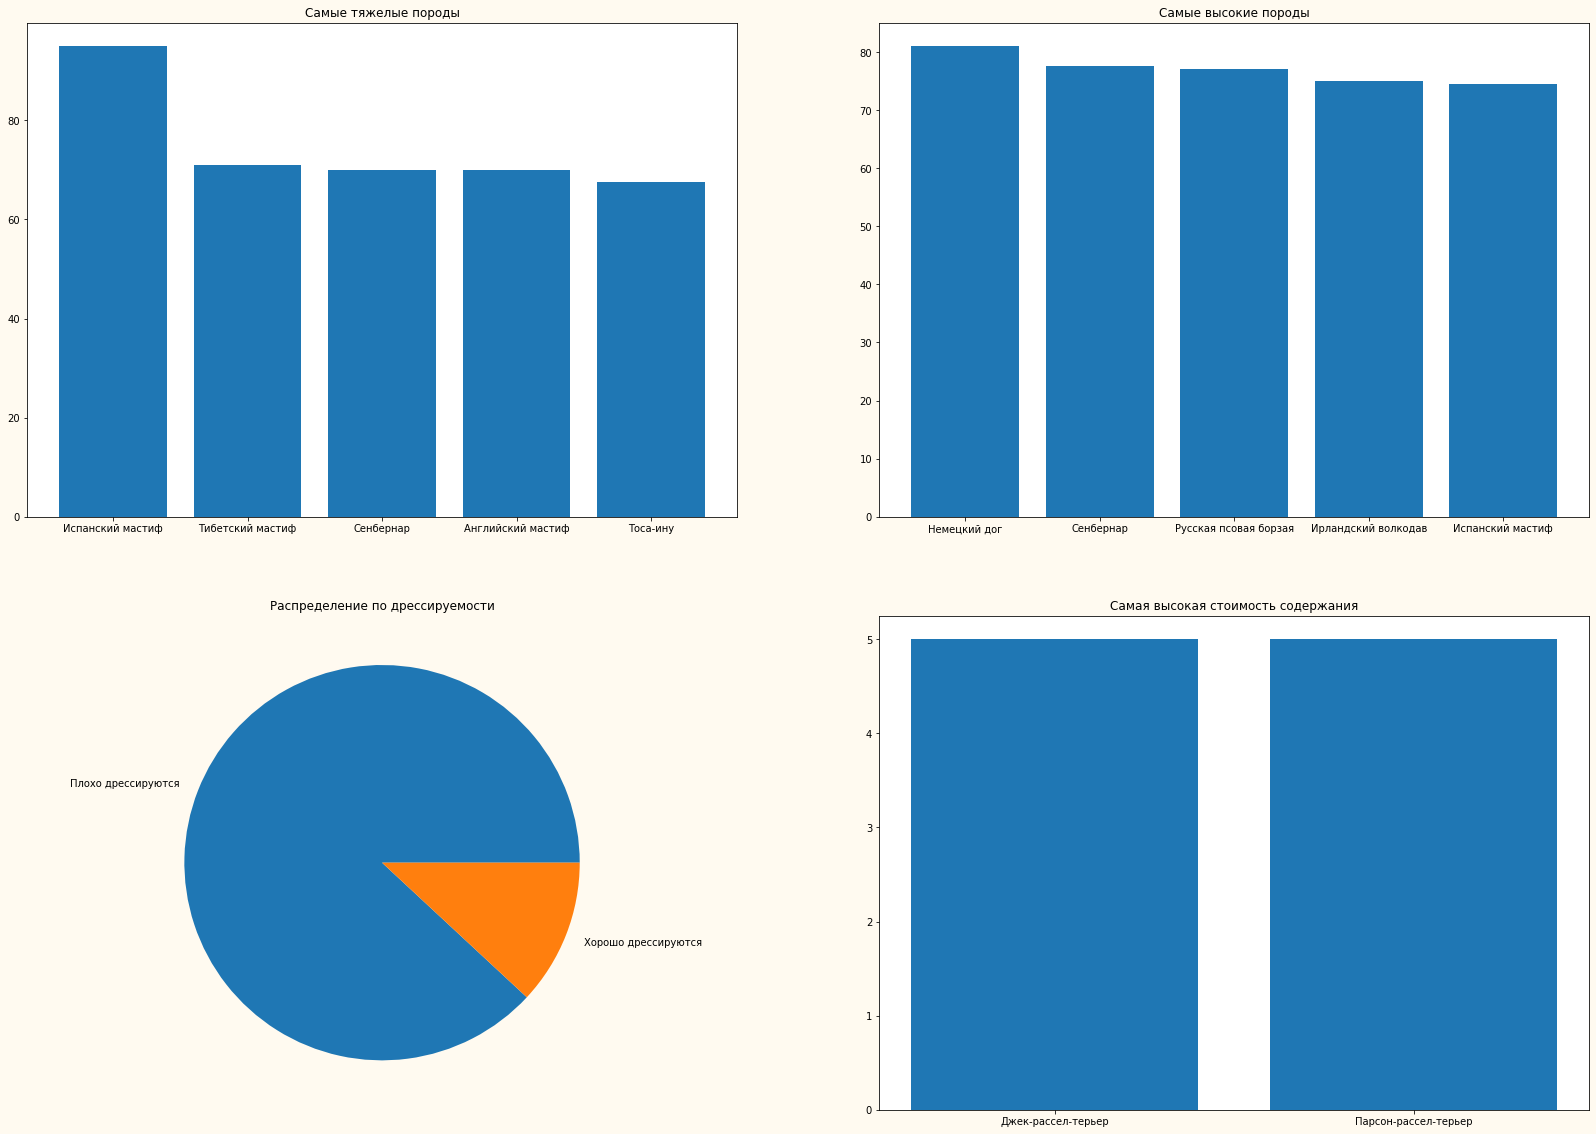

In [117]:
fig, axs = plt.subplots(2,2)

axs[0,0].bar(x1, y1)
axs[0,1].bar(x2, y2)

axs[1,0].pie(y3, labels = x3)
axs[1,1].bar(x4, y4)


axs[0,0].set_title('Самые тяжелые породы')
axs[0,1].set_title('Самые высокие породы')
axs[1,0].set_title('Распределение по дрессируемости')
axs[1,1].set_title('Самая высокая стоимость содержания')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(28)    #  ширина Figure
fig.set_figheight(20)    #  высота Figure

plt.show()

# Другие способы сбора данных

* библиотека `seleium`

https://medium.com/ml-book/web-scraping-using-selenium-python-3be7b8762747
* Google Sheets

https://support.google.com/docs/topic/9199554?hl=ru&ref_topic=3046366
<a href="https://ibb.co/fMyJYp6"><img src="https://i.ibb.co/31jKyN6/image.png" alt="image" border="0"></a>
<a href="https://ibb.co/myrZDTq"><img src="https://i.ibb.co/QH7SbQN/image.png" alt="image" border="0"></a>
* Сервисы парсинга: OctoParse
* API REST

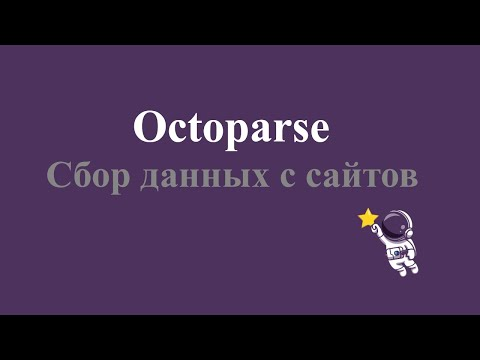

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('VwaoPKxtl7M', height = 600, width = 1060)